# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

Форма для сдачи будет опубликована позднее.

### Пожалуйста, не производите никаких манипуляций с  переменной `_dict_for_submission` и с ячейками, в которых она используется. На ее основе будет сгенерирован итоговый файл для сдачи задания.

In [1]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission = dict()


def transform_list(list_of_ints):
    return [str(x) for x in list_of_ints]
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 1. Небольшой numpy-разогрев. (10%)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Создайте матрицу A размерами 10 на 10 из упорядоченных целых чисел от 0 до 100
# hint: np.arange(100).reshape((10, 10))

A = np.arange(100).reshape((10, 10))
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [5]:
# Посчитайте средние значения в матрице по столбцам

# Ваш код здесь
np.mean(A, axis=0)

array([45., 46., 47., 48., 49., 50., 51., 52., 53., 54.])

In [6]:
# Транспонируйте матрицу A

# Ваш код здесь
A_t = A.T
A_t

array([[ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
       [ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
       [ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92],
       [ 3, 13, 23, 33, 43, 53, 63, 73, 83, 93],
       [ 4, 14, 24, 34, 44, 54, 64, 74, 84, 94],
       [ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95],
       [ 6, 16, 26, 36, 46, 56, 66, 76, 86, 96],
       [ 7, 17, 27, 37, 47, 57, 67, 77, 87, 97],
       [ 8, 18, 28, 38, 48, 58, 68, 78, 88, 98],
       [ 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]])

In [7]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

# Ваш код здесь
A_t * A

array([[   0,   10,   40,   90,  160,  250,  360,  490,  640,  810],
       [  10,  121,  252,  403,  574,  765,  976, 1207, 1458, 1729],
       [  40,  252,  484,  736, 1008, 1300, 1612, 1944, 2296, 2668],
       [  90,  403,  736, 1089, 1462, 1855, 2268, 2701, 3154, 3627],
       [ 160,  574, 1008, 1462, 1936, 2430, 2944, 3478, 4032, 4606],
       [ 250,  765, 1300, 1855, 2430, 3025, 3640, 4275, 4930, 5605],
       [ 360,  976, 1612, 2268, 2944, 3640, 4356, 5092, 5848, 6624],
       [ 490, 1207, 1944, 2701, 3478, 4275, 5092, 5929, 6786, 7663],
       [ 640, 1458, 2296, 3154, 4032, 4930, 5848, 6786, 7744, 8722],
       [ 810, 1729, 2668, 3627, 4606, 5605, 6624, 7663, 8722, 9801]])

In [8]:
# Посчитайте matrix product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Matrix_multiplication
# or https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

B = A @ A

#### Не меняйте следующую ячейку. Просто запустите ее.

In [9]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['B'] = transform_list(list(B.flatten()))
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [10]:
import pandas as pd

In [11]:
# If on colab, uncomment the following lines

# !wget "https://downloader.disk.yandex.com/disk/cd3ead013809a9da37434c792796d4b063dfc89571c68c273ca3788013b82bf8/5d865a2d/8bfV6Unxao6CYWcER5-G5fza25GZaFjE_xFvc0-ExCwlqmFjBf2bynRfBnL6ubJC8XhsoYHi7h9Nu6gfvS8wxg%3D%3D?uid=76549735&filename=forest_dataset.csv&disposition=attachment&hash=&limit=0&content_type=application%2Fvnd.ms-excel&owner_uid=76549735&fsize=1293856&hid=9b439c18e67923b45c3b3d8891bdf9ab&media_type=spreadsheet&tknv=v2&etag=45e530aa3c9796cb705d4e27be7a6e9c" -O forest_dataset.csv

In [12]:
all_data = pd.read_csv('forest_dataset.csv')

Выделим 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей (до конца ноутбука она более не используется), в `all_data` поместим оставшиеся 80%. Не будем перемешивать данные сознательно (для удобства проверки).

In [13]:
delayed_data = all_data[int(0.8 * len(all_data)):]
all_data = all_data[:int(0.8 * len(all_data))]

Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [14]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

delayed_labels = delayed_data[delayed_data.columns[-1]].values
delayed_feature_matrix = delayed_data[delayed_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [15]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [16]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [17]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix, two_class_labels)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [18]:
lr_clf = LogisticRegression(max_iter=3000)

In [19]:
# Ваш код здесь
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# train_feature_matrix_scaled = scaler.fit_transform(train_feature_matrix)
# test_feature_matrix_scaled = scaler.transform(test_feature_matrix)
lr_clf.fit(train_feature_matrix, train_labels)
preds_1 = lr_clf.predict(test_feature_matrix)
print('f1-score = {}'.format(f1_score(test_labels, preds_1)))
print('accuracy = {}'.format(accuracy_score(test_labels, preds_1)))

f1-score = 0.7143879742304938
accuracy = 0.7672112018669778


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [27]:
lr_clf = LogisticRegression(max_iter=3000, multi_class='multinomial')

# Ваш код здесь
#multi_scaler = StandardScaler()

feature_matrix_train, feature_matrix_test, labels_train, labels_test = train_test_split(feature_matrix,
                                                                                          labels,
                                                                                          test_size=0.2,
                                                                                          random_state=42)
# feature_matrix_train_scaled = multi_scaler.fit_transform(feature_matrix_train)
# feature_matrix_test_scaled = multi_scaler.transform(feauture_matrix_test)
lr_clf.fit(feature_matrix_train, labels_train)

LogisticRegression(max_iter=3000, multi_class='multinomial')

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [21]:
# Ваш код здесь
from sklearn.model_selection import GridSearchCV

parameters = {'C':np.linspace(0.01, 1, 10), 'penalty': ['l2']}
grid = GridSearchCV(estimator=LogisticRegression(multi_class='multinomial', max_iter=1000), 
                    param_grid=parameters, 
                    scoring='accuracy',
                    cv=5)
grid.fit(feature_matrix_train, labels_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000,
                                          multi_class='multinomial'),
             param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'penalty': ['l2']},
             scoring='accuracy')

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

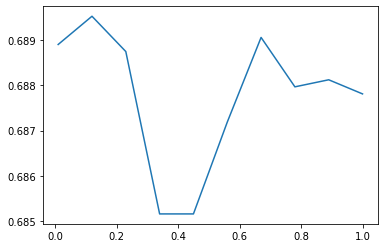

In [22]:
# Ваш код здесь
y_plot_grid_logreg = grid.cv_results_['mean_test_score']
x_plot_grid_logreg = np.linspace(0.01, 1, 10)
plt.plot(x_plot_grid_logreg, y_plot_grid_logreg);

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [23]:
# Ваш код здесь
grid.best_params_

{'C': 0.12, 'penalty': 'l2'}

Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [29]:
best_lr_clf = LogisticRegression(C=0.12, max_iter=1000)

# Ваш код здесь
best_lr_clf.fit(feature_matrix_train, labels_train)
preds = best_lr_clf.predict_proba(feature_matrix_test)

Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

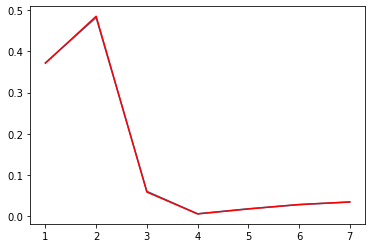

In [30]:
# Ваш код здесь
preds_proba_mean = np.mean(preds, axis=0)
x_plt = [i for i in range(1, 8)]
plt.plot(x_plt, preds_proba_mean);
train_quantity = [(labels_train == i).sum() / labels_train.shape[0] for i in set(labels_train)]
plt.plot(x_plt, train_quantity, c='r');

#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Ваш код здесь
from sklearn.model_selection import cross_val_score


knc_model = KNeighborsClassifier()
knc_model.fit(feature_matrix_train, labels_train)
print('unform mean cv score: {}'.format(cross_val_score(estimator=KNeighborsClassifier(weights='uniform'),
                                                                                       X=feature_matrix_train,
                                                                                       y=labels_train)
                                        .mean()))
print('distance mean cv score: {}'.format(cross_val_score(estimator=KNeighborsClassifier(weights='distance'),
                                                                                         X=feature_matrix_train,
                                                                                         y=labels_train)
                                          .mean()))

unform mean cv score: 0.71171875
distance mean cv score: 0.740625


Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [33]:
# Ваш код здесь
params_knn = {'n_neighbors': [i for i in range(1, 11)]}
grid_knn = GridSearchCV(estimator=KNeighborsClassifier(weights='distance'),
                        param_grid=params_knn, cv=5, scoring='accuracy')
grid_knn.fit(feature_matrix_train, labels_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

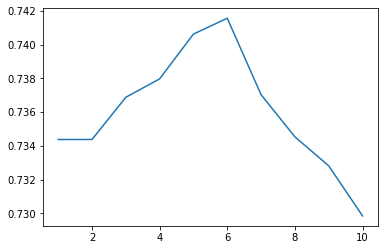

In [34]:
y_plot_scores = grid_knn.cv_results_['mean_test_score']
x_plot_neighbors = np.array([i for i in range(1, 11)])
plt.plot(x_plot_neighbors, y_plot_scores);

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [36]:
# Ваш код здесь
grid_knn.predict_proba(feature_matrix_test)

array([[0.54984525, 0.45015475, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.79305343, 0.20694657, ..., 0.        , 0.        ,
        0.        ],
       [0.85457735, 0.14542265, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.43159413, 0.56840587, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.69519408, 0.30480592, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30990906, 0.40592963, 0.13888112, ..., 0.14528019, 0.        ,
        0.        ]])

Создайте объект `best_knn_clf`, который представляет собой лучший классификатор.

In [37]:
# Hint: для этого достаточно указать стратегию вычисления весов и число соседей в конструкторе

best_knn_clf = KNeighborsClassifier(n_neighbors=6, weights='distance')

#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии `best_lr_clf` и лучшего kNN `best_knn_clf` на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [38]:
# Ваш код здесь
best_lr_clf.fit(feature_matrix_train, labels_train)
best_knn_clf.fit(feature_matrix_train, labels_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [39]:
print(accuracy_score(delayed_labels, best_lr_clf.predict(delayed_feature_matrix)))
print(accuracy_score(delayed_labels, best_knn_clf.predict(delayed_feature_matrix)))

0.6855
0.7525


#### Не меняйте следующую ячейку. Запустите ее для генерации `submission` файла.

In [ ]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['best_lr_clf_delayed'] = transform_list(list(best_lr_clf.predict(delayed_feature_matrix)))
_dict_for_submission['best_knn_clf_delayed'] = transform_list(list(best_knn_clf.predict(delayed_feature_matrix)))

import json
with open('submission_hw1_basic.json', 'w') as iofile:
    json.dump(_dict_for_submission, iofile)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Данный файл необходимо будет прикрепить к Google-форме для сдачи домашнего задания. __Для идентификации используется e-mail, который вы указали при регистрации на курс. Проверка производится автоматически. Если вы подпишитесь другим e-mail'ом, задание просто не будет засчитано.__

На этом задание завершено. Мы будем рады, если вы оставите обратную связь по данному заданию [по ссылке](https://forms.gle/2qaf14ky3J6HZfe48). Она анонимна ;)